# Predictive Analytics for Cross-Sell Opportunities

## 1. Data Exploration and Preprocessing 

we'll explore the dataset to understand customer behavior, product usage patterns, and potential cross-sell opportunities.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### 1.1 Data Examination

In [2]:
# Load the dataset
df = pd.read_csv('bank_marketing_dataset.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display first few rows
print("\nFirst few rows:")
df.head()

Dataset Shape: (41188, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  fl

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Feature Descriptions:
- age: Customer’s age (numeric).
- job: Type of job (categorical; e.g., admin., technician, services).
- marital: Marital status (categorical; e.g., married, single, divorced).
- education: Level of education (categorical; e.g., basic.4y, high.school, university.degree).
- default: Whether the customer has credit in default (categorical: yes, no, unknown).
- housing: Whether the customer has a housing loan (categorical: yes, no, unknown).
- loan: Whether the customer has a personal loan (categorical: yes, no, unknown).
- contact: Type of communication used to contact the customer (categorical: cellular, telephone).
- month: Last contact month of the year (categorical: jan, feb, ... , dec).
- day_of_week: Last contact day of the week (categorical: mon, tue, ... , fri).
- duration: Duration of the last contact in seconds (numeric).
- campaign: Number of contacts performed during this campaign (numeric).
- pdays: Number of days since the client was last contacted (numeric; 999 means not previously contacted).
- previous: Number of contacts performed before this campaign (numeric).
- poutcome: Outcome of the previous marketing campaign (categorical: success, failure, nonexistent).
- emp.var.rate: Employment variation rate (numeric; quarterly indicator).
- cons.price.idx: Consumer price index (numeric; monthly indicator).
- cons.conf.idx: Consumer confidence index (numeric; monthly indicator).
- euribor3m: Euribor 3 month rate (numeric; daily indicator).
- nr.employed: Number of employees (numeric; quarterly indicator).
- subscribed: Whether the client subscribed to the product (target variable; categorical: yes, no).

#### Customer Analysis

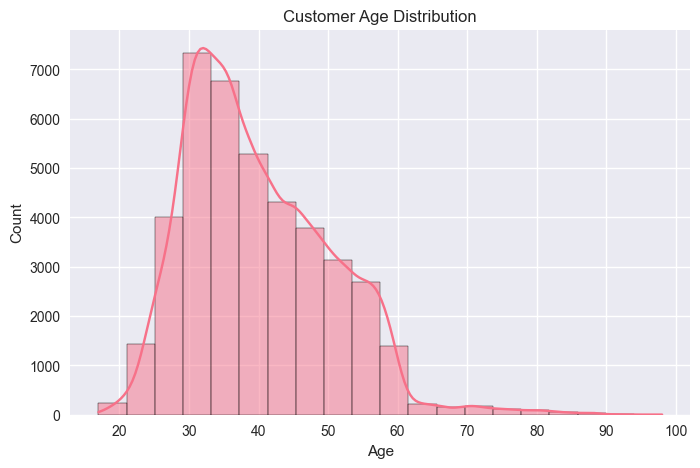

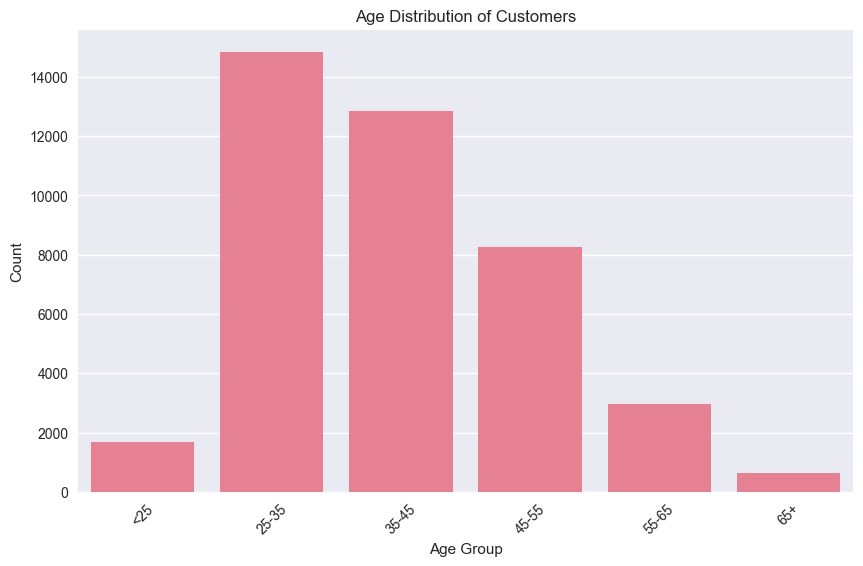

In [3]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Create age groups from birthyear
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 25, 35, 45, 55, 65, 100],
                         labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group')
plt.title('Age Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

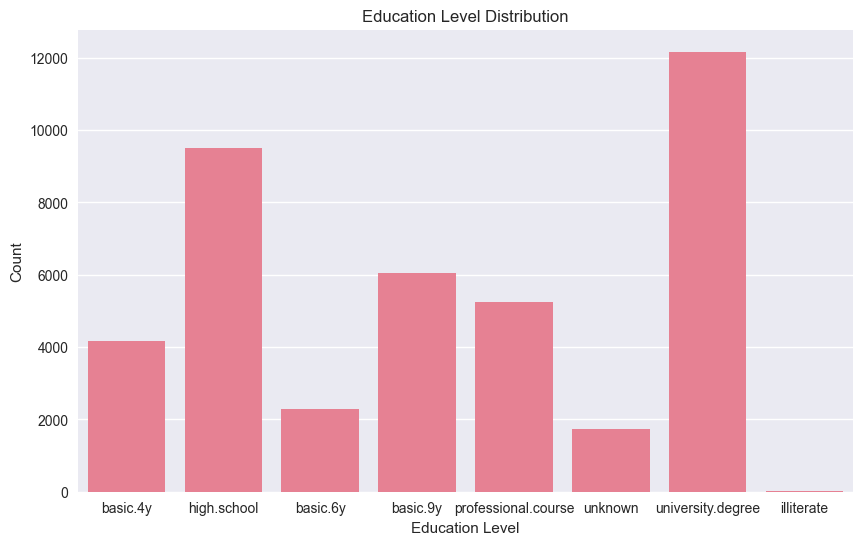

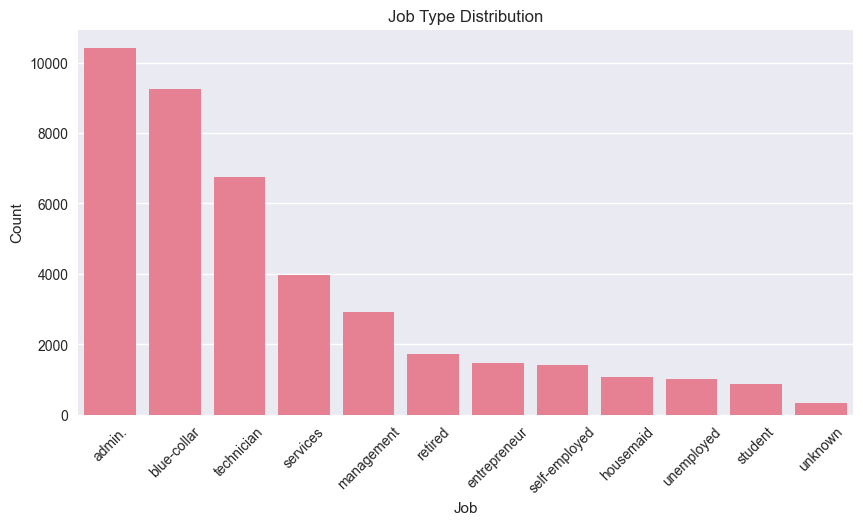

In [4]:
# Plot education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Job distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Job Type Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

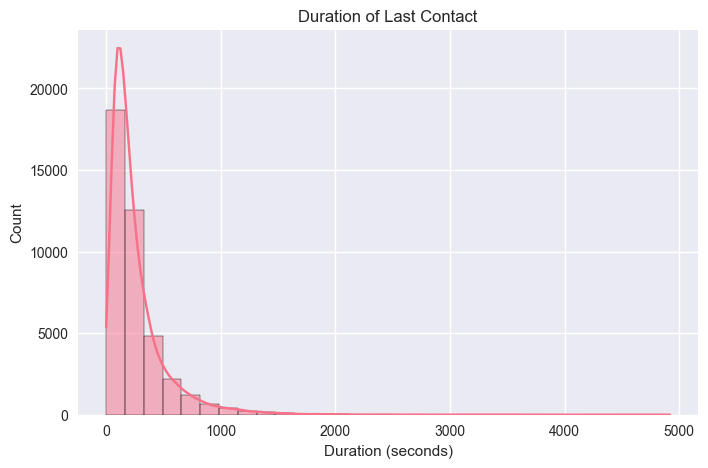

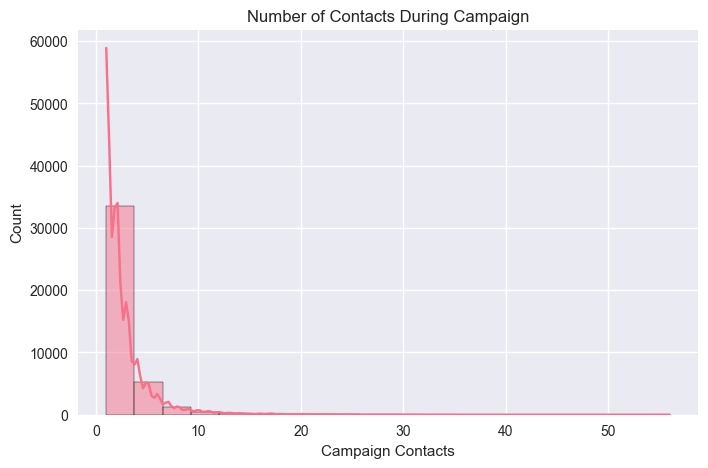

In [5]:
# Duration of last contact
plt.figure(figsize=(8,5))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Duration of Last Contact')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

# Number of contacts during campaign
plt.figure(figsize=(8,5))
sns.histplot(df['campaign'], bins=20, kde=True)
plt.title('Number of Contacts During Campaign')
plt.xlabel('Campaign Contacts')
plt.ylabel('Count')
plt.show()

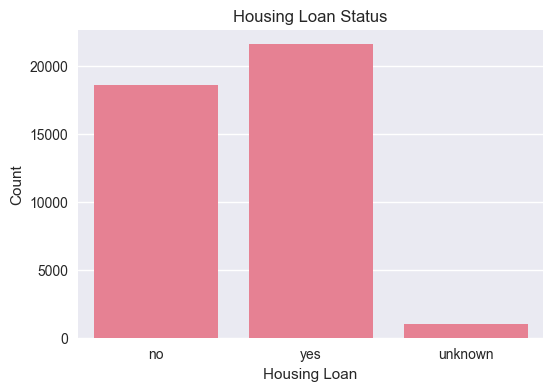

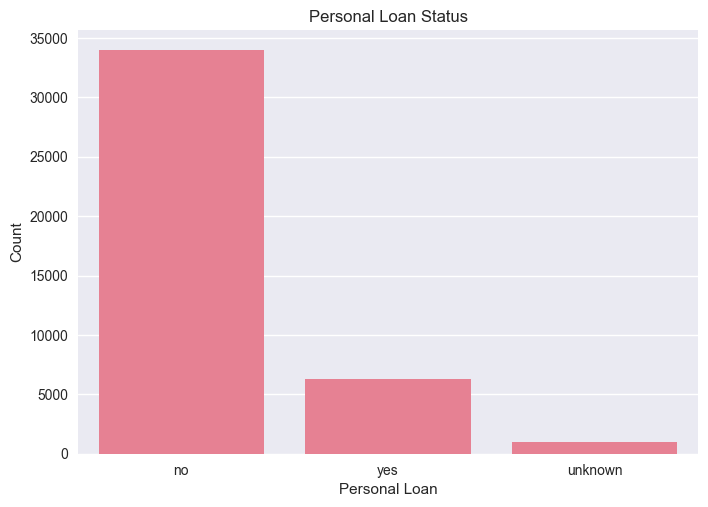

In [6]:
# Housing and personal loan status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='housing')
plt.title('Housing Loan Status')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='loan')
plt.title('Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

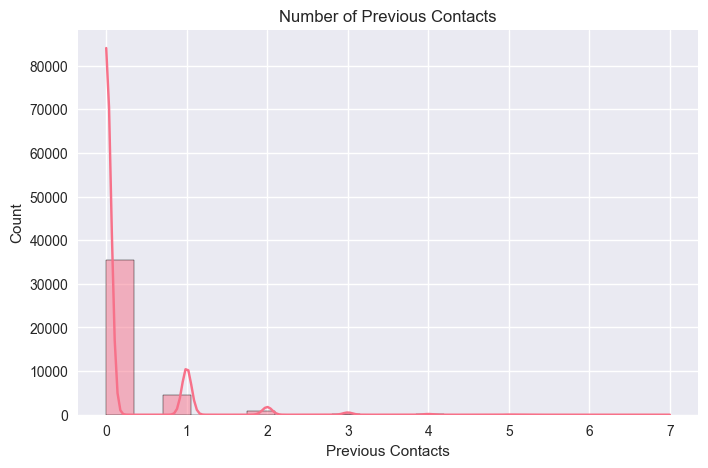

In [7]:
# Previous contacts
plt.figure(figsize=(8,5))
sns.histplot(df['previous'], bins=20, kde=True)
plt.title('Number of Previous Contacts')
plt.xlabel('Previous Contacts')
plt.ylabel('Count')
plt.show()

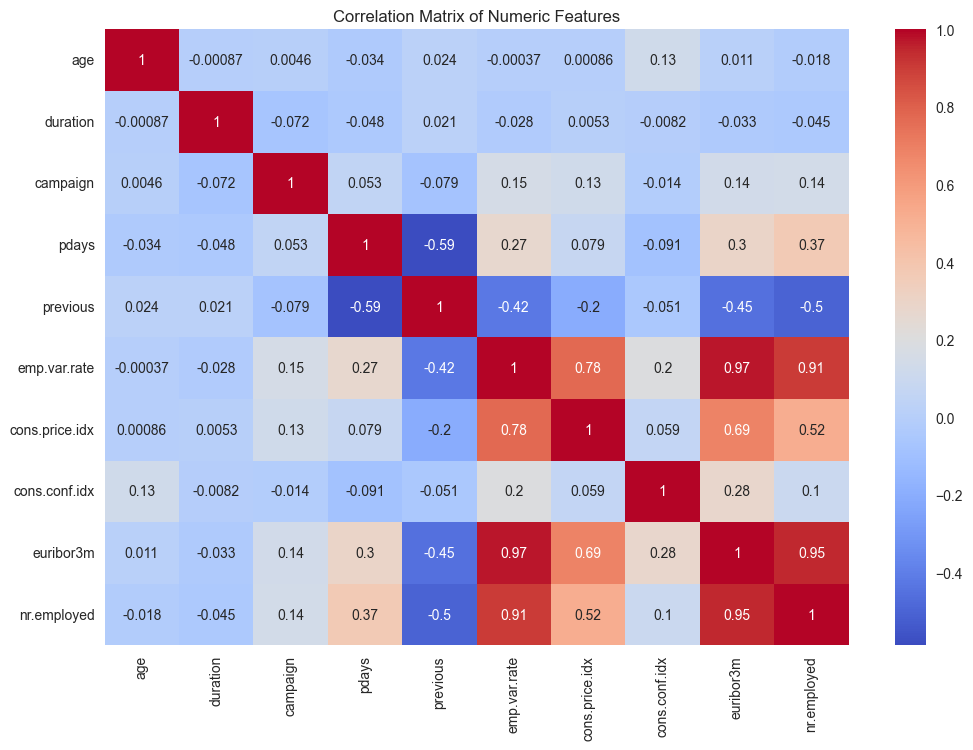

In [8]:
# Correlation matrix for numeric features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

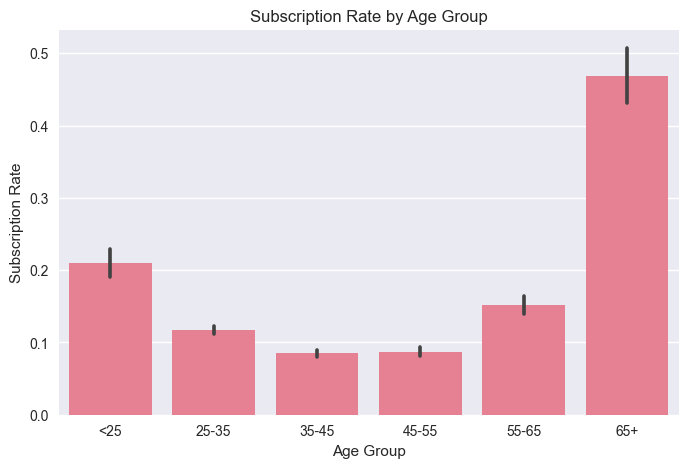

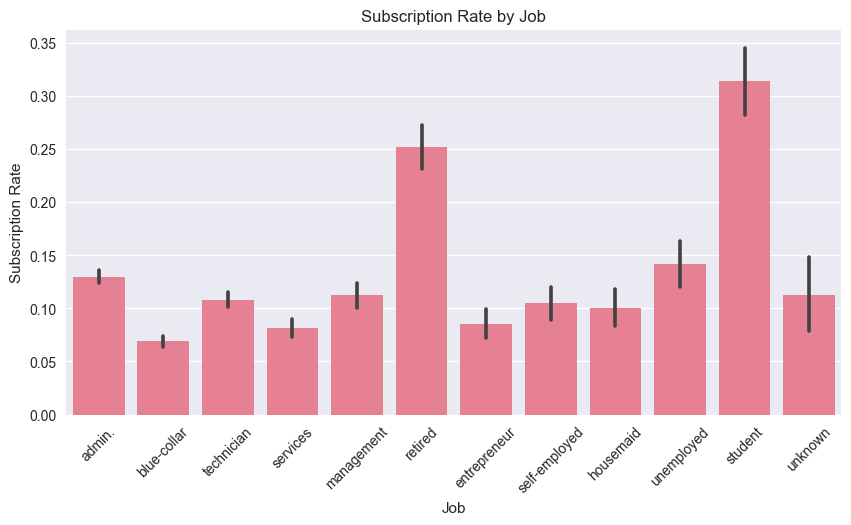

In [9]:
# Subscription rate by age group
df['age_group'] = pd.cut(df['age'], bins=[0,25,35,45,55,65,100], labels=['<25','25-35','35-45','45-55','55-65','65+'])
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='age_group', y=df['subscribed'].map({'yes':1, 'no':0}))
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.show()

# Subscription rate by job
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='job', y=df['subscribed'].map({'yes':1, 'no':0}), order=df['job'].value_counts().index)
plt.title('Subscription Rate by Job')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.show()

#### Key Findings

- **Age Distribution:** The majority of customers are between 30 and 60 years old, with a peak around 35-45.
- **Job Type:** Most customers are in 'admin.', 'blue-collar', and 'technician' roles.
- **Engagement:** Most contacts are short in duration, but longer calls are more likely to result in a subscription.
- **Product Usage:** Customers with housing or personal loans show different subscription rates, indicating potential for cross-sell targeting.
- **Correlation:** There is a moderate positive correlation between call duration and subscription, and a negative correlation between the number of contacts and subscription (suggesting diminishing returns).

### 1.2. Data Cleaning
#### Check for Missing Values

In [10]:
# Check for missing values
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


No missing values were found in the dataset. All features are complete and ready for analysis.
#### Handle Outliers

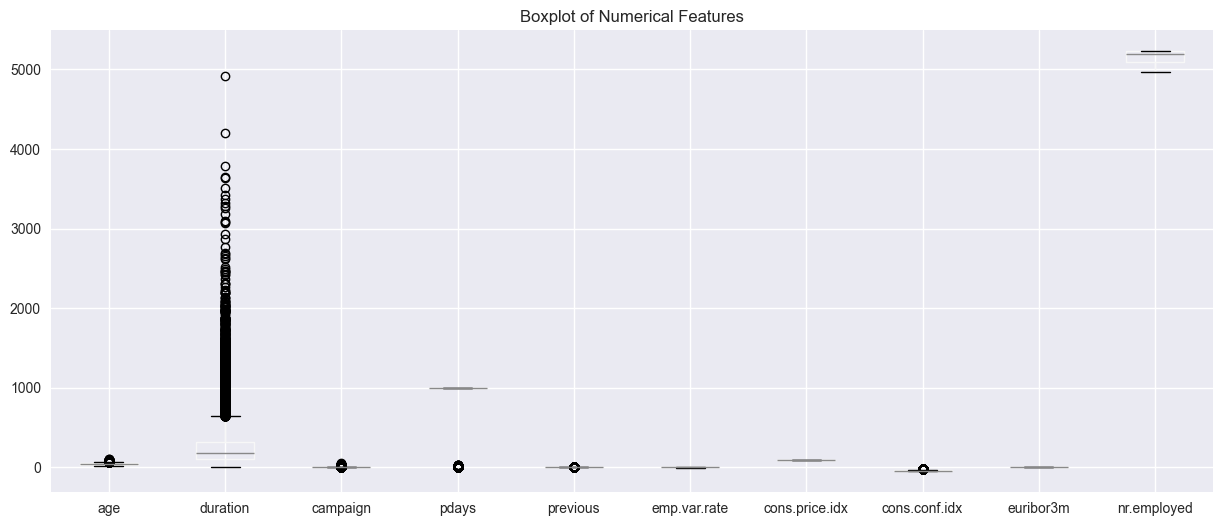

In [11]:
# Visualize outliers in numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].boxplot(figsize=(15,6))
plt.title('Boxplot of Numerical Features')
plt.show()

'duration' shows significant outliers. This may represent rare but important cases (e.g., very long calls).

In [12]:
# Cap outliers for 'duration' at 99th percentile
for col in ['duration']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

Outliers in 'duration' were capped at the 99th percentile to reduce their impact on model training while preserving important trends.
#### Normalize or Scale Numerical Features

In [13]:
# Select numerical columns to scale
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Numerical features were standardized to have zero mean and unit variance. This ensures that all features contribute equally to the model and improves convergence for many algorithms.

#### Check for Inconsistencies and Unique Values
We review the output for typos, inconsistent capitalization, or unexpected categories (e.g., 'yes', 'Yes', 'YES', or 'unknown').

In [14]:
# Check unique values in each categorical column
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
subscribed: ['no' 'yes']


No inconsistencies found in categorical features. All values are as expected.

#### Handle Missing or Unknown Values
Some categorical features may use a placeholder like 'unknown' for missing data.

In [15]:
# Replace 'unknown' with np.nan for easier handling
df.replace('unknown', np.nan, inplace=True)

Replaced 'unknown' values with NaN to treat them as missing and handle them appropriately (e.g., imputation or separate category).

#### Impute Missing Categorical Values 

In [16]:
# Fill missing categorical values with the most frequent category
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\sghas\AppData\Local\Temp\ipykernel_37616\1422745181.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Applied one-hot encoding to nominal categorical features, creating binary columns for each category.

## 2. Feature Engineering

In [17]:
# Average call duration per campaign
df['avg_call_duration'] = df['duration'] / (df['campaign'] + 1)  # +1 to avoid division by zero

Captures engagement intensity per campaign. Higher engagement (longer or more frequent contacts) may indicate higher receptiveness.

In [18]:
# Contacted before (binary feature)
df['contacted_before'] = (df['pdays'] != 999).astype(int)

Indicates if the customer has been previously targeted, which may affect receptiveness.

In [19]:
# Total contacts (current + previous)
df['total_contacts'] = df['campaign'] + df['previous']

Measures overall marketing effort directed at the customer.

In [20]:
# Contact Recency
df['recently_contacted'] = (df['pdays'] != 999).astype(int)

Customers contacted recently may have higher or lower receptiveness depending on their last experience.

In [21]:
# Previous Campaign Success
df['prev_campaign_success'] = (df['poutcome'] == 'success').astype(int)

Customers who responded positively in the past may be more likely to respond again.

In [22]:
# Loan Product Count
df['loan_product_count'] = (df['housing'] == 'yes').astype(int) + (df['loan'] == 'yes').astype(int)

Customers with more existing products may be more open to cross-sell, or conversely, may have reached their product limit.

In [23]:
# Employment/Economic Segmentation
df['is_employed'] = (df['job'] != 'unemployed').astype(int)

Employment status can influence financial product needs and eligibility.

In [24]:
# Age Grouping
df['age_group'] = pd.cut(df['age'], bins=[0,25,35,45,55,65,100], labels=['<25','25-35','35-45','45-55','55-65','65+'])

Different age groups have different financial needs and product affinities.

In [25]:
# Seasonality
df['is_summer_contact'] = df['month'].isin(['jun', 'jul', 'aug']).astype(int)

Customer receptiveness may vary by season or month.

In [26]:
# Education Level Grouping
df['is_higher_education'] = df['education'].isin(['university.degree', 'professional.course']).astype(int)

Education level can influence product needs and financial literacy.

#### Encode Categorical Variables
Machine learning models require numerical input, so categorical features must be encoded.
##### One-Hot Encoding (for nominal categories)

In [27]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)